In [24]:
import pandas as pd # data frame library
import seaborn as sns # data visialization library
import matplotlib.pyplot as plt
import numpy as np
import os

In [25]:
os.getcwd()

'C:\\Users\\fkari653'

In [26]:
df=pd.read_csv('weight-height.csv')

In [27]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [29]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [30]:
#missing valu  Detection
df.isnull().any()

Gender    False
Height    False
Weight    False
dtype: bool

Text(0, 0.5, 'Weight')

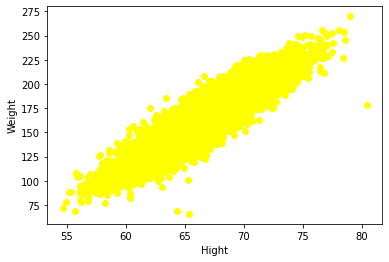

In [31]:
#Data Visualization
import matplotlib.pyplot as plt
plt.scatter(df['Height'],df['Weight'],color='yellow')
plt.xlabel('Hight')
plt.ylabel('Weight')

In [32]:
df.duplicated() # To Find out the Duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
8550    False
8551    False
8552    False
8553    False
8554    False
Length: 8555, dtype: bool

In [33]:
#Encoding

from sklearn.preprocessing import LabelEncoder

In [34]:
le=LabelEncoder()

In [35]:
df.Gender = le.fit_transform(df['Gender'])

In [36]:
df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405


In [147]:
x=df.drop('Weight',axis=1).values
y=df['Weight'].values


In [148]:

df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405


In [149]:
print(x)
x.shape

[[ 1.         73.84701702]
 [ 1.         68.78190405]
 [ 1.         74.11010539]
 ...
 [ 0.         65.58405676]
 [ 0.         67.42997138]
 [ 0.         60.92179087]]


(8555, 2)

In [150]:
print(y)
y.shape

[241.8935632 162.3104725 212.7408556 ... 155.9426708 151.6784055
 131.2537378]


(8555,)

# separate Training and Testing Data

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=1)

In [153]:
print(xtest)
xtest.shape

[[ 0.         65.06803769]
 [ 1.         70.82464272]
 [ 1.         68.66359393]
 ...
 [ 0.         67.89565929]
 [ 1.         69.03106285]
 [ 1.         71.47610128]]


(2567, 2)

In [154]:
xtest.shape

(2567, 2)

In [155]:
ytest.shape

(2567,)

ValueError: x and y must be the same size

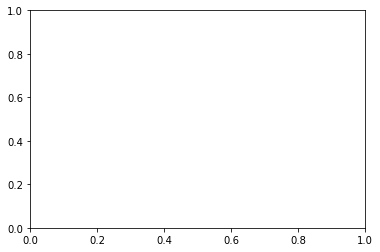

In [156]:
plt.scatter(xtest,ytest, color="black")
plt.plot(xtest,y_pred, color="blue", linewidth=2)
plt.xticks(())
plt.yticks(())

plt.show()

# Linear Regression

In [157]:
from sklearn.linear_model import LinearRegression

In [158]:
reg=LinearRegression()

In [159]:
reg.fit(xtrain,ytrain)  ##To Fit the Model

LinearRegression()

# Evaluate the ML model

In [160]:
# The coefficients
print('Coefficients is %d' %len(reg.coef_))

Coefficients is 2


In [161]:
print('the estimated intercept is %.2f' %reg.intercept_)

the estimated intercept is -244.55


In [162]:
y_pred=reg.predict(xtest)
print(y_pred)
y_pred.shape

[143.83013436 197.53417989 184.63515112 ... 160.7078525  186.82852694
 201.4226542 ]


(2567,)

In [232]:
reg.score(xtest,ytest) ## Model Accurecy

-17459412.351250734

In [233]:
pred_y_df=pd.DataFrame({'Actual Value':ytest,'Predicted value':y_pred,'Diference':ytest-y_pred})
pred_y_df[0:10]

,Actual Value,Predicted value,Diference
0,0,143.830134,-143.830134
1,1,197.534180,-196.534180
2,1,184.635151,-183.635151
3,0,149.318948,-149.318948
4,1,197.992697,-196.992697
5,0,136.189139,-136.189139
6,1,184.452279,-183.452279
7,1,160.304003,-159.304003
8,0,122.688290,-122.688290
9,0,116.697920,-116.697920


Text(0.5, 1.0, 'Actual vs. Predicted')

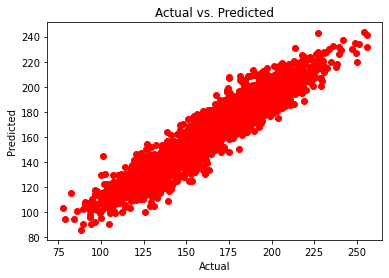

In [166]:
import matplotlib.pyplot as plt
plt.scatter (ytest,y_pred,color='red')
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [167]:
## MSE(mean_squared_error)
from sklearn.metrics import mean_squared_error,r2_score

In [168]:
MSE=mean_squared_error

In [169]:
print("Mean squared error: %.2f" % MSE(ytest,y_pred))

Mean squared error: 99.67


In [172]:
mean_squared_error(ytest, y_pred, squared=False)

9.983612070823842

In [173]:
print("Coefficient of determination: %.2f" % r2_score(ytest,y_pred))

Coefficient of determination: 0.91


# Apply KNN REGRESSOR

In [174]:
from sklearn.neighbors import KNeighborsRegressor
 

In [175]:
KNN_reg=KNeighborsRegressor()

In [176]:
KNN_reg.fit(xtrain,ytrain)

KNeighborsRegressor()

In [177]:
KNN_reg.score(xtest,ytest)

0.8838502073708883

In [178]:
KNNpredict=KNN_reg.predict(xtest)
KNNpredict

array([150.1761117 , 197.46276978, 179.03501546, ..., 160.26227546,
       180.65461322, 200.56451578])

In [179]:
print("Mean squared error: %.2f" % mean_squared_error(ytest,KNNpredict))

Mean squared error: 123.15


In [180]:
RMSE=mean_squared_error(ytest,KNNpredict, squared=False)
RMSE

11.097461810448813

# #  FOR TUNING

# HYPER PARAMETER OPTIMIZATION

## RANDOMIZED SEARCH CV

In [181]:
from sklearn.model_selection import RandomizedSearchCV

In [182]:
n_neighbors = [int(x) for x in np.linspace(start=40, stop=300, num=40)]

In [183]:
weights=['uniform','distance']

In [184]:
## Creat ids

grids={'n_neighbors':n_neighbors,
      'weights':weights
      }

In [185]:
KNN_reg2=KNeighborsRegressor()

In [186]:
RMSE=RandomizedSearchCV(KNN_reg2,grids,n_iter=300,cv=5)

In [187]:
RMSE.fit(xtrain,ytrain)

C:\Users\fkari653\Anaconda3\envs\DL\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 80 is smaller than n_iter=300. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=300,
                   param_distributions={'n_neighbors': [40, 46, 53, 60, 66, 73,
                                                        80, 86, 93, 100, 106,
                                                        113, 120, 126, 133, 140,
                                                        146, 153, 160, 166, 173,
                                                        180, 186, 193, 200, 206,
                                                        213, 220, 226, 233, ...],
                                        'weights': ['uniform', 'distance']})

In [188]:
RMSE.cv_results_

{'mean_fit_time': array([0.00678215, 0.00471587, 0.0065805 , 0.00160522, 0.00537739,
        0.00624819, 0.00312328, 0.00312381, 0.        , 0.00099659,
        0.00531754, 0.00514207, 0.00577765, 0.00724511, 0.00312471,
        0.00624895, 0.01231413, 0.00724607, 0.00611591, 0.00339103,
        0.00240765, 0.00378971, 0.00710745, 0.00844851, 0.00624943,
        0.00312462, 0.00312471, 0.00624909, 0.00312462, 0.00312471,
        0.0074729 , 0.00665002, 0.00199456, 0.00571733, 0.00648923,
        0.00259314, 0.0093739 , 0.00312462, 0.00624924, 0.003125  ,
        0.00791216, 0.00312486, 0.00312476, 0.        , 0.00624938,
        0.00624919, 0.00624933, 0.00624905, 0.00312371, 0.00625567,
        0.00624743, 0.00725207, 0.00312901, 0.01249723, 0.00624957,
        0.0079699 , 0.01388187, 0.00624876, 0.00624847, 0.        ,
        0.00312419, 0.00624881, 0.00652003, 0.00512457, 0.00280561,
        0.00533233, 0.00874629, 0.00724301, 0.00321774, 0.00542626,
        0.00724611, 0.00220056,

In [189]:
results=pd.DataFrame(RMSE.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006782,0.001716,0.016355,0.002570,uniform,40,"{'weights': 'uniform', 'n_neighbors': 40}",0.891592,0.894664,0.889079,0.891465,0.899212,0.893202,0.003489,4
1,0.004716,0.006844,0.015556,0.002212,distance,40,"{'weights': 'distance', 'n_neighbors': 40}",0.872384,0.875740,0.875696,0.875956,0.885808,0.877117,0.004543,80
2,0.006580,0.001620,0.015161,0.001164,uniform,46,"{'weights': 'uniform', 'n_neighbors': 46}",0.892189,0.894941,0.889437,0.891182,0.899676,0.893485,0.003572,1
3,0.001605,0.002327,0.018458,0.004659,distance,46,"{'weights': 'distance', 'n_neighbors': 46}",0.873123,0.876386,0.876301,0.876328,0.886440,0.877716,0.004537,79
4,0.005377,0.000493,0.014593,0.005062,uniform,53,"{'weights': 'uniform', 'n_neighbors': 53}",0.891832,0.894755,0.889100,0.890952,0.899811,0.893290,0.003737,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.009364,0.007645,0.076955,0.001516,distance,286,"{'weights': 'distance', 'n_neighbors': 286}",0.876542,0.878518,0.878843,0.879065,0.890665,0.880726,0.005049,58
76,0.003124,0.006248,0.074982,0.006249,uniform,293,"{'weights': 'uniform', 'n_neighbors': 293}",0.880059,0.882877,0.879759,0.881377,0.891499,0.883114,0.004335,39
77,0.003124,0.006248,0.081239,0.006241,distance,293,"{'weights': 'distance', 'n_neighbors': 293}",0.876529,0.878480,0.878859,0.879026,0.890671,0.880713,0.005058,60
78,0.006233,0.007633,0.076320,0.007363,uniform,300,"{'weights': 'uniform', 'n_neighbors': 300}",0.879687,0.882445,0.879493,0.880990,0.891133,0.882750,0.004323,40


In [190]:
RMSE.best_params_

{'weights': 'uniform', 'n_neighbors': 46}

In [191]:
RMSE.best_score_

0.8934849336756063

In [192]:
Best=RMSE.best_estimator_
Best

KNeighborsRegressor(n_neighbors=46)

In [193]:
Best.score(xtest,ytest)


0.9033570276693765

# Comment

In [ ]:
#For the given dataset,Applying  Linear Regression Model,I got the following observations:
Accurecy- 0.9059112424422664,Mean squared error: 96.84,RMSE:9.84059674909533
On the otherhand 
#Applying KNN Regressor Model,I got
Accurecy-0.8821086423439015,Mean squared error:121.34 ,RMSE:11.015229581640359
        
#After Tuning  KNN Regressor Model,I got 
Accurecy 0.9035799896305765 when KNeighborsRegressor(n_neighbors=53)
# By comparing this two Models ,we see that Linear Regression Model gave me the highest Accurecy for this datasets.

# KNN Classifier:

In [195]:
#The given dataset is
df


,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405


In [196]:
x=df.drop('Gender',axis=1).values
y=df['Gender'].values


In [197]:
x

array([[ 73.84701702, 241.8935632 ],
       [ 68.78190405, 162.3104725 ],
       [ 74.11010539, 212.7408556 ],
       ...,
       [ 65.58405676, 155.9426708 ],
       [ 67.42997138, 151.6784055 ],
       [ 60.92179087, 131.2537378 ]])

In [198]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=1)

In [201]:
xtrain

array([[ 72.38530097, 189.1655919 ],
       [ 60.96014679, 124.8767957 ],
       [ 69.11929182, 168.8644028 ],
       ...,
       [ 66.53981222, 175.0932547 ],
       [ 66.56377205, 156.832191  ],
       [ 70.55524376, 198.4602486 ]])

In [202]:
ytrain

array([1, 0, 0, ..., 1, 0, 1])

## Applying KNN Classifier

In [203]:
from sklearn.neighbors import KNeighborsClassifier

In [204]:
KNN2=KNeighborsClassifier()

In [205]:
KNN2.fit(xtrain,ytrain)

KNeighborsClassifier()

## Evalute the model(Accuracy, Confusion Matrix, ROC, AUC, Classification Report)

In [206]:
KNN2.score(xtest,ytest) ## Accurecy score

0.9146864043630697

In [207]:
KNN2predict=KNN2.predict(xtest)
KNN2predict

array([1, 1, 1, ..., 0, 1, 1])

In [208]:
MSE=mean_squared_error(ytest,KNN2predict)
MSE

0.08531359563693026

In [209]:

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_roc_curve

In [210]:
classification_report(ytest,KNN2predict) ##Classification Report

'              precision    recall  f1-score   support\n\n           0       0.90      0.89      0.90      1055\n           1       0.92      0.93      0.93      1512\n\n    accuracy                           0.91      2567\n   macro avg       0.91      0.91      0.91      2567\nweighted avg       0.91      0.91      0.91      2567\n'

In [211]:
print(classification_report(ytest,KNN2predict))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1055
           1       0.92      0.93      0.93      1512

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



In [212]:
test_confusion_matrix=confusion_matrix(ytest,KNN2predict)

In [213]:
test_confusion_matrix

array([[ 938,  117],
       [ 102, 1410]], dtype=int64)

<AxesSubplot:>

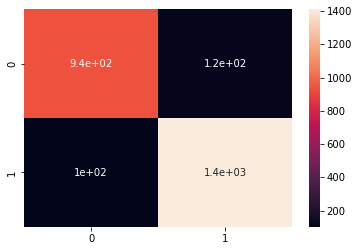

In [214]:
sns.heatmap(test_confusion_matrix,annot=True)

In [215]:
tp,fp,fn,tn=confusion_matrix(ytest,KNN2predict).reshape(-1)
tp,fp,fn,tn

(938, 117, 102, 1410)

In [216]:
accurecy=(tp+tn)/(tp+tn+fp+fn) ## True Event/Total Event
accurecy

0.9146864043630697

## ROC Curve

In [217]:
plot_roc_curve(df,xtest,ytest)

C:\Users\fkari653\Anaconda3\envs\DL\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ValueError: Expected 'estimator' to be a binary classifier, but got DataFrame

## Tuning for KNN Classifier

In [218]:
KNN3=KNeighborsClassifier()

In [219]:
n_neighbors = [int(x) for x in np.linspace(start=40, stop=300, num=40)]


In [220]:
RMSE2=RandomizedSearchCV(KNN3,grids,n_iter=250,cv=5)
RMSE2

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=250,
                   param_distributions={'n_neighbors': [40, 46, 53, 60, 66, 73,
                                                        80, 86, 93, 100, 106,
                                                        113, 120, 126, 133, 140,
                                                        146, 153, 160, 166, 173,
                                                        180, 186, 193, 200, 206,
                                                        213, 220, 226, 233, ...],
                                        'weights': ['uniform', 'distance']})

In [221]:
RMSE2.fit(xtrain,ytrain)

C:\Users\fkari653\Anaconda3\envs\DL\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 80 is smaller than n_iter=250. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=250,
                   param_distributions={'n_neighbors': [40, 46, 53, 60, 66, 73,
                                                        80, 86, 93, 100, 106,
                                                        113, 120, 126, 133, 140,
                                                        146, 153, 160, 166, 173,
                                                        180, 186, 193, 200, 206,
                                                        213, 220, 226, 233, ...],
                                        'weights': ['uniform', 'distance']})

In [222]:
RMSE2.cv_results_

{'mean_fit_time': array([0.00460353, 0.00624876, 0.00937524, 0.00313034, 0.01712632,
        0.0062562 , 0.0040781 , 0.00624924, 0.00624142, 0.00624909,
        0.00674162, 0.00593681, 0.00412126, 0.00624995, 0.01172009,
        0.00624762, 0.00624919, 0.00937181, 0.00312471, 0.00731268,
        0.00312448, 0.0062324 , 0.        , 0.00624886, 0.00625525,
        0.00119882, 0.00724559, 0.00259256, 0.00412979, 0.00908842,
        0.00624776, 0.00412941, 0.00412216, 0.00119638, 0.00783134,
        0.00572391, 0.00413027, 0.00625534, 0.00312438, 0.00624843,
        0.        , 0.00391955, 0.00625014, 0.00937667, 0.00312366,
        0.0156342 , 0.00937099, 0.00313034, 0.00759664, 0.00523362,
        0.0071136 , 0.00340428, 0.00494828, 0.00512705, 0.0041121 ,
        0.00935855, 0.00624876, 0.00936685, 0.01316013, 0.00312467,
        0.00514026, 0.00312505, 0.00312471, 0.00312481, 0.0031251 ,
        0.00624857, 0.00624971, 0.00624809, 0.00624952, 0.00312514,
        0.00625291, 0.00624194,

In [223]:
results=pd.DataFrame(RMSE2.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004604,0.004536,0.061449,0.012516,uniform,40,"{'weights': 'uniform', 'n_neighbors': 40}",0.899833,0.911519,0.914023,0.908939,0.927318,0.912327,0.008898,17
1,0.006249,0.007653,0.012513,0.006257,distance,40,"{'weights': 'distance', 'n_neighbors': 40}",0.898998,0.913189,0.910684,0.913116,0.928989,0.912995,0.009561,11
2,0.009375,0.007655,0.053109,0.007656,uniform,46,"{'weights': 'uniform', 'n_neighbors': 46}",0.903172,0.912354,0.915693,0.906433,0.926483,0.912827,0.008112,14
3,0.003130,0.006261,0.015602,0.000029,distance,46,"{'weights': 'distance', 'n_neighbors': 46}",0.903172,0.913189,0.912354,0.912281,0.929825,0.914164,0.008647,1
4,0.017126,0.002993,0.047204,0.001729,uniform,53,"{'weights': 'uniform', 'n_neighbors': 53}",0.902337,0.913189,0.912354,0.908104,0.929825,0.913162,0.009177,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.000000,0.000000,0.096178,0.003613,distance,286,"{'weights': 'distance', 'n_neighbors': 286}",0.894825,0.909015,0.909850,0.905597,0.934002,0.910658,0.012842,53
76,0.008450,0.006198,0.123613,0.009671,uniform,293,"{'weights': 'uniform', 'n_neighbors': 293}",0.888982,0.904007,0.904841,0.903926,0.928989,0.906149,0.012866,78
77,0.004321,0.006107,0.093630,0.005589,distance,293,"{'weights': 'distance', 'n_neighbors': 293}",0.894825,0.909015,0.909015,0.905597,0.933166,0.910324,0.012552,58
78,0.001011,0.002021,0.122142,0.003745,uniform,300,"{'weights': 'uniform', 'n_neighbors': 300}",0.887312,0.904007,0.904841,0.905597,0.928989,0.906149,0.013290,77


In [224]:
RMSE2.best_score_

0.9141639574729812

In [225]:
RMSE2.best_params_

{'weights': 'distance', 'n_neighbors': 46}

In [226]:
Best=RMSE2.best_estimator_
Best

KNeighborsClassifier(n_neighbors=46, weights='distance')

In [227]:
Best.score(xtest,ytest)

0.9213089209193611

In [228]:
from sklearn.neighbors import NearestNeighbors
 

In [229]:
neigh = NearestNeighbors(n_neighbors=46)


In [230]:
 neigh.fit(x,y)
NearestNeighbors(n_neighbors=46)

NearestNeighbors(n_neighbors=46)

In [231]:
 A = neigh.kneighbors_graph(x)
A.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Comment

In [ ]:
#For the given dataset,Applying KNN Classifier Model,I got the following observations:
Accurecy-0.9146864043630697, Mean squared error: 96.84,RMSE:9.84059674909533
On the otherhand 
#Applying KNN Classifier Model,I got
Accurecy-0.8821086423439015,Mean squared error:121.34 ,RMSE:11.015229581640359
        
#After Tuning  KNN Classifier Model,I got 
Accurecy 0.9213089209193611 when KNeighborsRegressor(n_neighbors=46)
